<a href="https://colab.research.google.com/github/vidisha3095/ML_PBLE_6/blob/main/ML_PBLE_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name:Vidisha More
#Branch: CMPN-B
#Roll.no:21102B0015
#Batch:1
#Github-Link:https://github.com/vidisha3095/ML_PBLE_6.git


#Support Vector Machine-classification

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize


from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score

# SVM Model
from sklearn.svm import SVC


# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, RocCurveDisplay


In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
# Check for missing values
print(df.isnull().sum())
# Handle missing values if necessary
df.fillna(df.mean(), inplace=True)  # Example: fill with mean

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


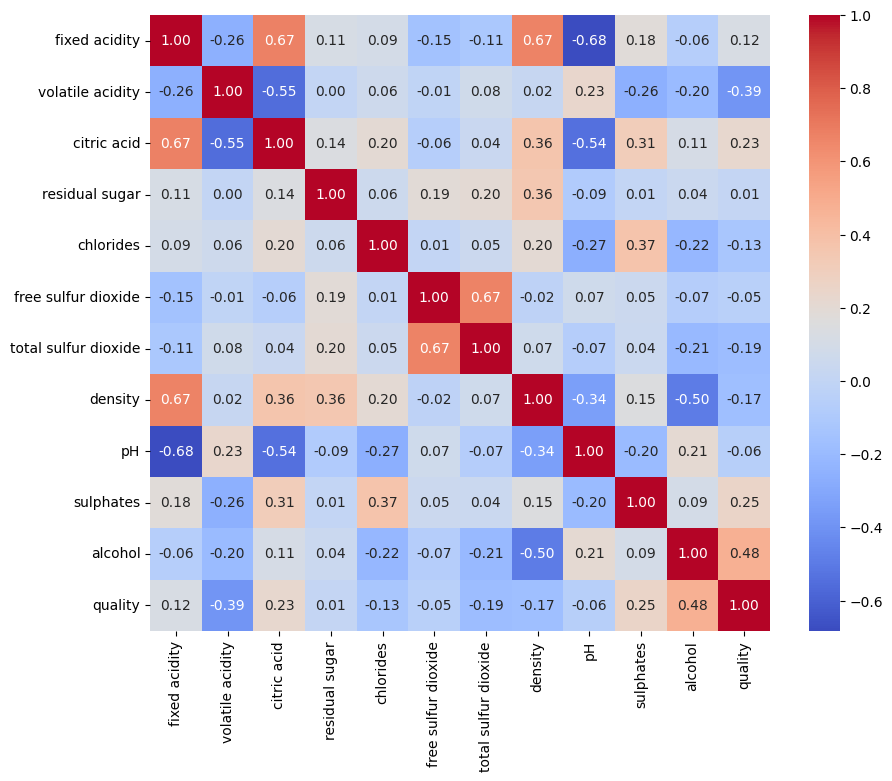

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [10]:
print(df['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: ylabel='count'>

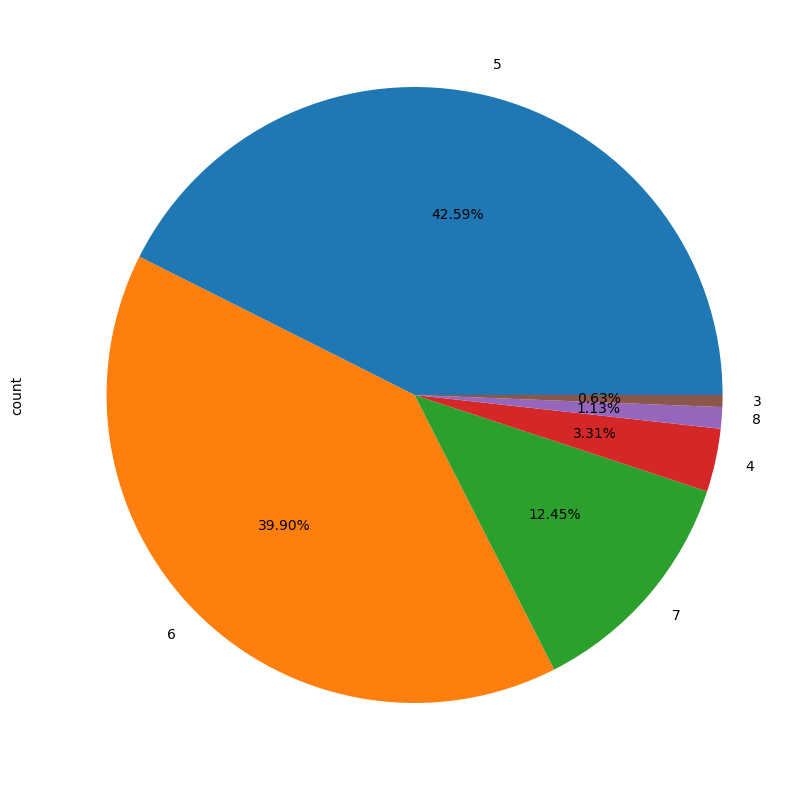

In [20]:
plt.figure(1, figsize=(10,10))
df['quality'].value_counts().plot.pie(autopct="%1.2f%%")

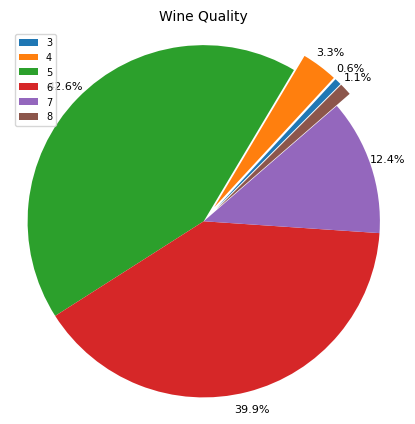

In [18]:
quality = df["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (5,5),
             autopct='%1.1f%%',
             startangle=45,
             labels=None,
             pctdistance=1.1,
             explode=explode_list,
             textprops={'fontsize': 8})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 10)
ax.set(ylabel=None)
plt.axis('equal')
plt.legend(labels=quality.index, loc="upper left", fontsize=7);

<ipython-input-13-aa157f437ce0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['alcohol'])


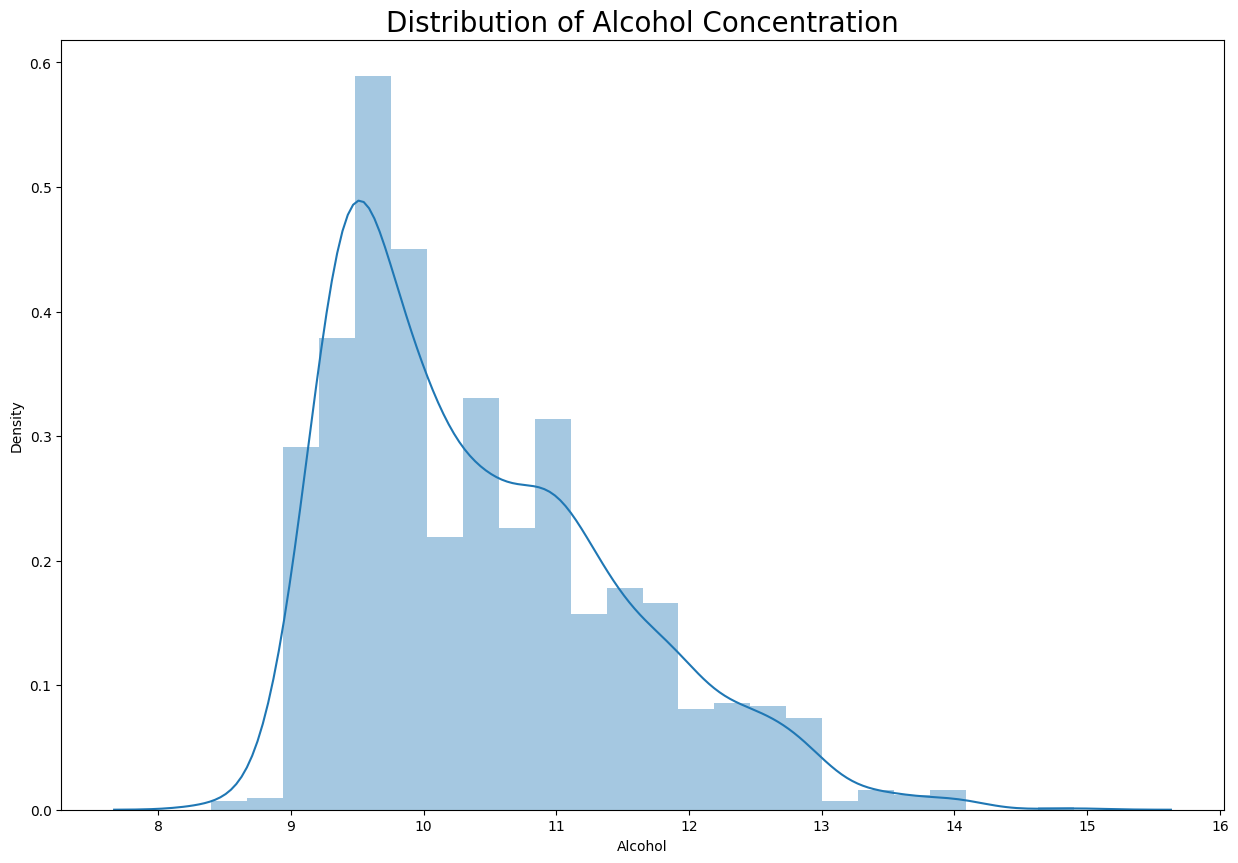

In [13]:
plt.figure(figsize=(15,10))
ax = sns.distplot(df['alcohol'])
ax.set_title('Distribution of Alcohol Concentration', size=20)
ax.set(ylabel='Density', xlabel='Alcohol');

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [21]:
# Separate features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable (quality)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Create the SVM classifier with probability=True
svm_model = SVC(kernel='linear', probability=True)

# Train the model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [24]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.56
Precision: 0.46
Recall: 0.56
F1 Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


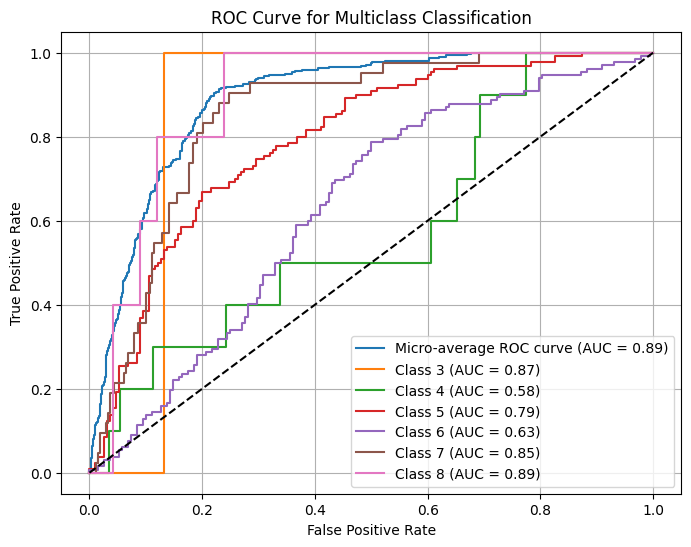

In [25]:
# Get unique classes from the target variable
unique_classes = np.unique(y)

# Binarize the output for multiclass ROC calculations based on unique classes
y_test_binarized = label_binarize(y_test, classes=unique_classes)
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities
y_prob = svm_model.predict_proba(X_test)

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    if np.sum(y_test_binarized[:, i]) > 0:  # Check if the class is present
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    else:
        print(f"Class {i} is not present in y_test, skipping.")

# Calculate micro-average ROC curve and ROC AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc["micro"] = roc_auc_score(y_test_binarized, y_prob, average='micro')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:.2f})')
for i in range(n_classes):
    if i in roc_auc:  # Only plot if the class AUC was calculated
        plt.plot(fpr[i], tpr[i], label=f'Class {unique_classes[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.grid()
plt.show()

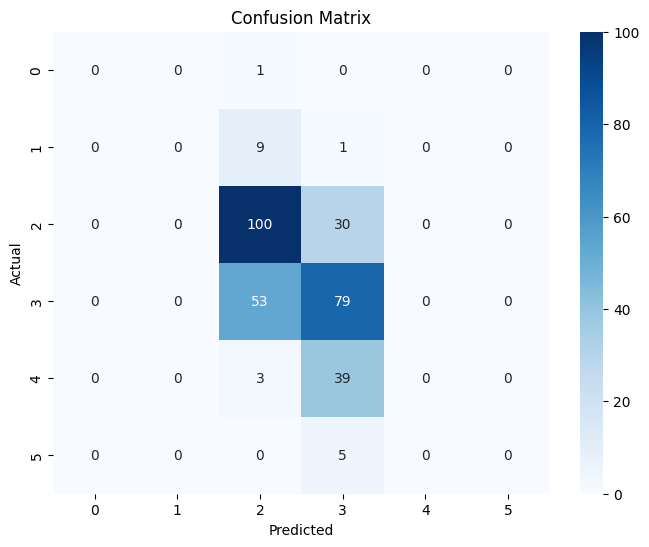

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .................................C=0.1, gamma=scale; total time=   0.1s
[CV] END .................................C=0.1, gamma=scale; total time=   0.1s
[CV] END .................................C=0.1, gamma=scale; total time=   0.1s
[CV] END .................................C=0.1, gamma=scale; total time=   0.1s
[CV] END .................................C=0.1, gamma=scale; total time=   0.1s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.1s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.1s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.1s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.1s
[CV] END ..................................C=0.1, gamma=auto; total time=   0.1s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.1s
[CV] END ..................................C=0.

In [28]:
def analyze_svm_performance(y_true, y_pred, model, num_classes):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print("### Performance Metrics ###")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

    print("### Classification Report ###")
    print(classification_report(y_true, y_pred))

    conf_matrix = confusion_matrix(y_true, y_pred)
    print("### Confusion Matrix ###")
    print(conf_matrix)

    # Multiclass ROC Curve
    print("\n### ROC Curves ###")
    # Binarize the output
    y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
    y_pred_prob = model.predict_proba(X_test)  # Get the probability estimates

    # Compute ROC curve and ROC AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Multiclass SVM Model')
    plt.legend(loc='lower right')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

### Performance Metrics ###
Accuracy: 0.56
Precision: 0.46
Recall: 0.56
F1 Score: 0.50

### Classification Report ###
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.60      0.77      0.68       130
           6       0.51      0.60      0.55       132
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.19      0.23      0.20       320
weighted avg       0.46      0.56      0.50       320

### Confusion Matrix ###
[[  0   0   1   0   0   0]
 [  0   0   9   1   0   0]
 [  0   0 100  30   0   0]
 [  0   0  53  79   0   0]
 [  0   0   3  39   0   0]
 [  0   0   0   5   0   0]]

### ROC Curves ###


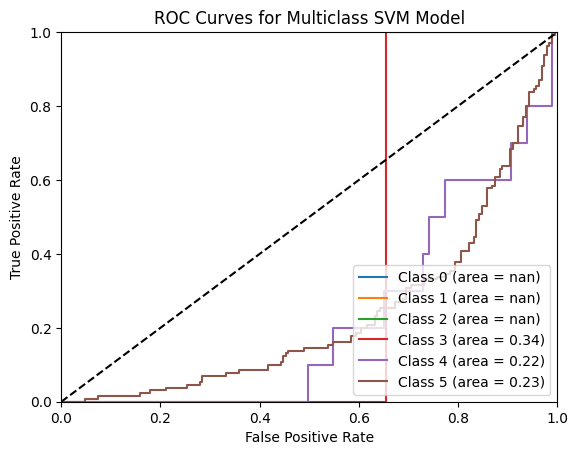

In [29]:
analyze_svm_performance(y_test, y_pred, svm_model, num_classes=6)

#Support Vector Machine-regression

In [30]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR  # Importing Support Vector Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [31]:
df = pd.read_csv('concrete.csv')

In [32]:
# Define features and target variable
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column (compressive strength)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct the SVM regressor
svm_regressor = SVR(kernel='linear')  # You can try 'rbf' or other kernels as well


In [33]:
# Train the regressor on the training set
svm_regressor.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = svm_regressor.predict(X_test)

# Evaluate the regressor's performance using specified metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("### SVM Regression Metrics ###")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

### SVM Regression Metrics ###
Mean Squared Error (MSE): 126.17
R-squared (R²): 0.51


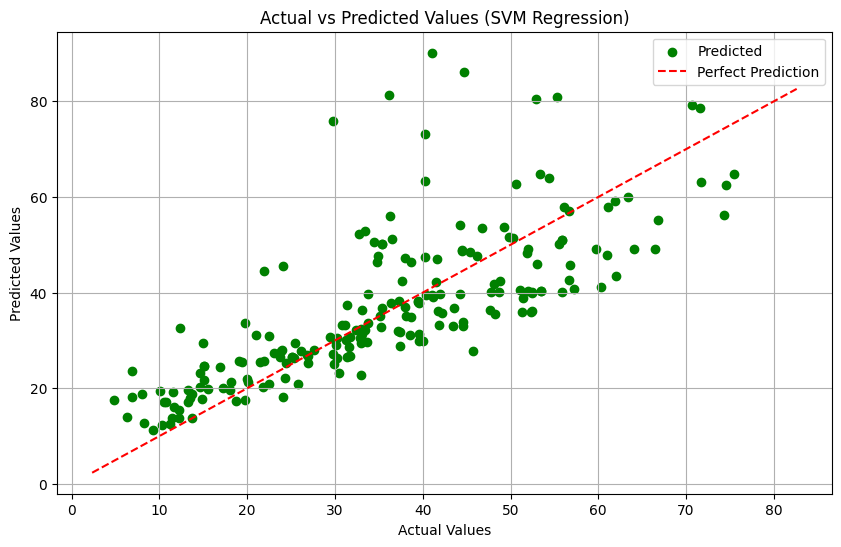

In [34]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')  # Line of equality
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVM Regression)')
plt.legend()
plt.grid()
plt.show()

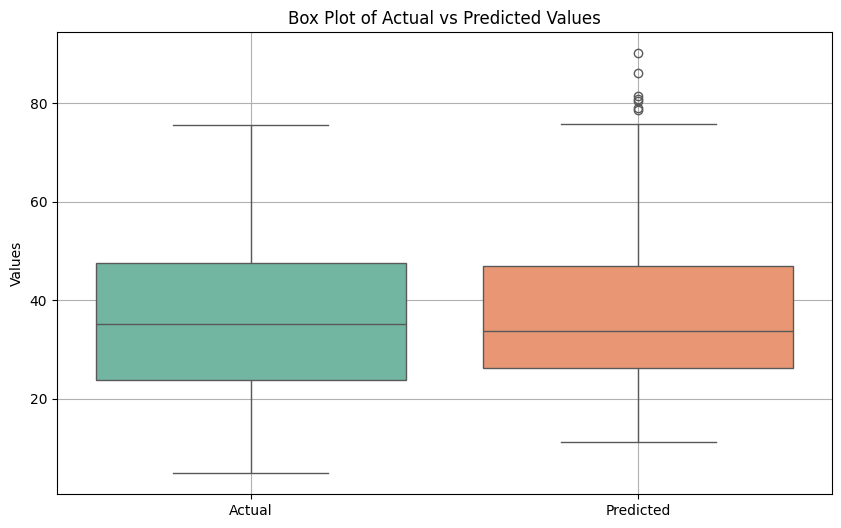

In [35]:
import pandas as pd

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, palette="Set2")
plt.title('Box Plot of Actual vs Predicted Values')
plt.ylabel('Values')
plt.grid()
plt.show()

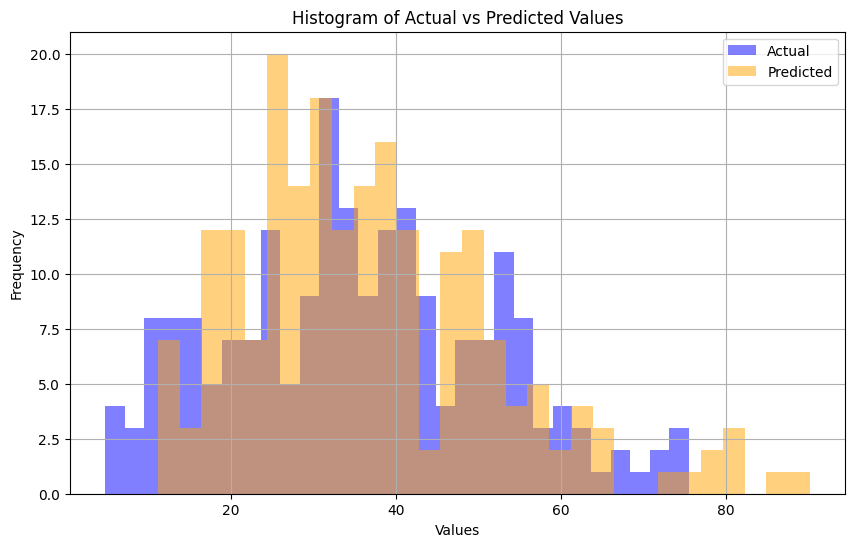

In [36]:
# Histogram of Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted', color='orange')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [37]:
def compare_svm_performance(mse, r2, y_true, y_pred):
    # Performance comparison
    print("### Performance Comparison of SVM Regression Model ###")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")

    # Discuss strengths and weaknesses
    if r2 < 0.5:
        print("Weakness: The model explains less than 50% of the variance in the data. Consider improving feature selection or model tuning.")
    elif r2 < 0.75:
        print("Moderate performance: The model explains 50-75% of the variance. That's pretty good.")
    else:
        print("Strength: The model explains over 75% of the variance in the data, indicating very good predictive power.")


# Call the function after evaluating the model
compare_svm_performance(mse, r2, y_test, y_pred)

### Performance Comparison of SVM Regression Model ###
Mean Squared Error (MSE): 126.17
R-squared (R²): 0.51
Moderate performance: The model explains 50-75% of the variance. That's pretty good.
